### **Context:**

 - Why is this problem important to solve?
     - There is a huge demand for used cars and the pre-owned car market has grown to be larger than the new car market in India.

### **The objective:**

 - What is the intended goal?
     - The key objective of this project is to build a pricing model that can effectively predict the price of used cars and ultimately help the business in devising profitable strategies using differential pricing.

### **The key questions:**

- What are the key questions that need to be answered?
    - How can we minimize the large uncertainties in both pricing and supply?
    - Which factors highly influence the actual worth of a car?

### **The problem formulation**:

- What is it that we are trying to solve using data science?
    - We are trying to predict the price of used cars using significant factors in the dataset. 

## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques. 

# **Milestone 1** 

### **Loading libraries**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Let us load the data**

In [2]:
data = pd.read_csv("used_cars.csv")

### **Understand the data by observing a few rows**

In [3]:
# View first 5 rows
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
# View last 5 rows Hint: Use tail() method
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


**Observations and Insights:** The Serial Number `S.No.` is just a unique identifier for a car and thus we assume that it does not have any predictive power to predict the dependent variable `Price`. There seems to be little data on `Price` and `New_price` for how much missing value there is in just the few rows we observe.

### **Let us check the data types and and missing values of each column** 

In [5]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


**Observations and Insights:** 
- The dataset has **7253 observations and 14 columns**. 
- The columns `Mileage`, `Engine`, `Power`, `Seats`, `New_price`, and `Price` have **missing values** as the number of non-null values is less the total number of observations for these two variables. The majority of the column `New_price` contains missing values. We may want to drop this column, unless it has very high information about `Price`, then we would still use the variable.
- We observe that the columns `Name`, `Location`, `Fuel_Type`, `Transmission`, and `Owner_Type` have data type **object**, which means they are strings or categorical variables.
    - Though the columns `Year` and `Seats` are of the data type **int64** and **float64**, these variables are categorical because there is a fixed number of possible values to take on.
- The remaining variables are all numerical.

In [6]:
# Check total number of missing values of each column. Hint: Use isnull() method
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

In [7]:
# Remove S.No. column from data. Hint: Use inplace = True
data.drop(['S.No.'], axis = 1, inplace = True)

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [8]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.280417,22.779692,9.479468
std,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.809277,27.759344,11.187917
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


**Observations and Insights:**
- The distribution of `Engine`, `Power`, `New_price`, and `Price` are skewed to the right. 

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [9]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include = ['object'] 
data.describe(include = ['object'])

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7253,7253,7253,7253,7253
unique,2041,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,949,3852,5204,5952


**Number of unique observations in each category**

In [10]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(data[column].nunique())
    
    print('-'*50)

For column: Name
2041
--------------------------------------------------
For column: Location
11
--------------------------------------------------
For column: Fuel_Type
5
--------------------------------------------------
For column: Transmission
2
--------------------------------------------------
For column: Owner_Type
4
--------------------------------------------------


#### **Observations and Insights: **
- `Location`, `Fuel_Type`, `Transmission`, and `Owner_Type` all have a manageable number of unique values (11 or under).
- `Name` has 2041 unique values. We may want to cluster the names into more generalized groups (ex. by Brand). 

**Think About It**: 

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven? 
    - Personal note: Maybe there is correlation between the features. We need to check this and take out unnecessary variables/repeated info for more accurate results. 
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?
    - Personal note: The mileage of a car refers to the distance driven with one gallon/liter. This cannot be zero and hence we need to check for errors.

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [11]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values('Kilometers_Driven', ascending = False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights:**
- The largest value `Kilometers_Driven` takes on is 6500000, which is over 8 times as large as the second largest value. 
- Within the top 10 largest values of `Kilometers_Driven`, the values drop rapidly. Possibly all outliers.

In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [12]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data.drop(index = 2328, inplace = True)

**Check Mileage extreme values**

In [13]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values('Mileage').head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [14]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

**Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

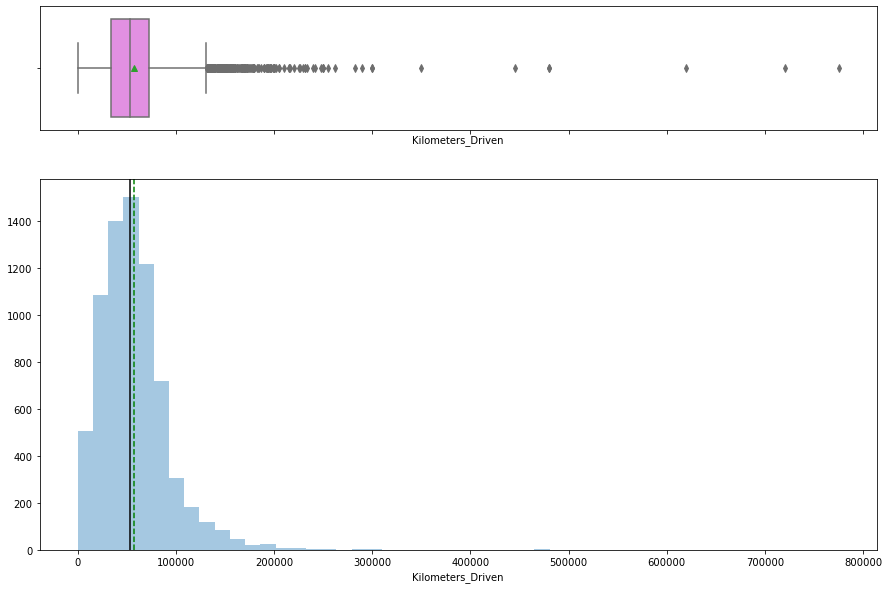

In [15]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

Personal Note: Linear regression models have 5 assumptions, one of them being predictors and target variables are normally distributed. When this assumption is not fulfilled, our predictios are more unreliable. In general, outliers adversly affect a model's performance, especially regression-based models. It leads to misleading (and sometimes wrong) predictions. **To transform skewed data**, we can perform (1) Log transform (2) Square Root transform (3) Box-Cox transform. Read about these transformations @TowardsDataScience:Top3MethodsForHandlingSkewedData.

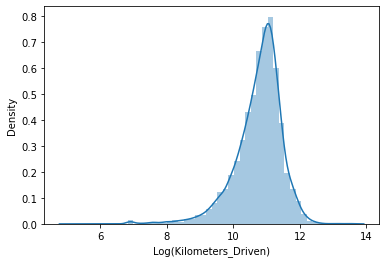

In [16]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**Observations and Insights:**
- Log transformation generally normalizes the `Kilometers_Driven` data

In [17]:
# We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**.

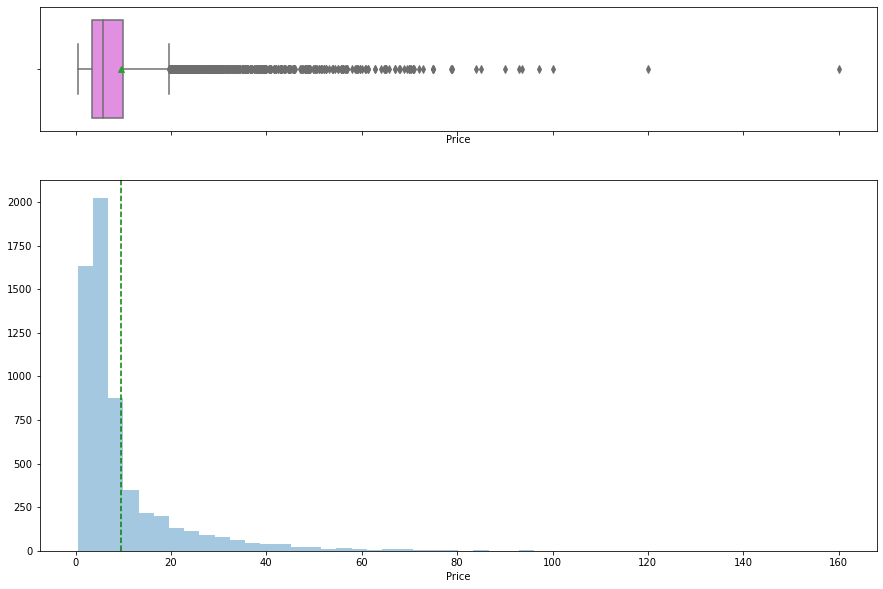

In [18]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

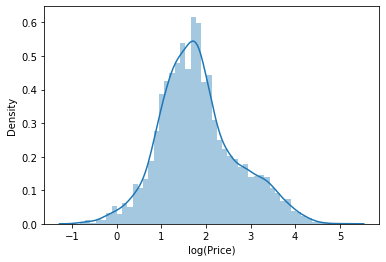

In [19]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data['Price']), axlabel = 'log(Price)');

In [20]:
# We can Add a transformed Price feature in data
data['price_log'] = np.log(data['Price'])

**Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like. (Mileage	Engine	Power	Seats	New_price)

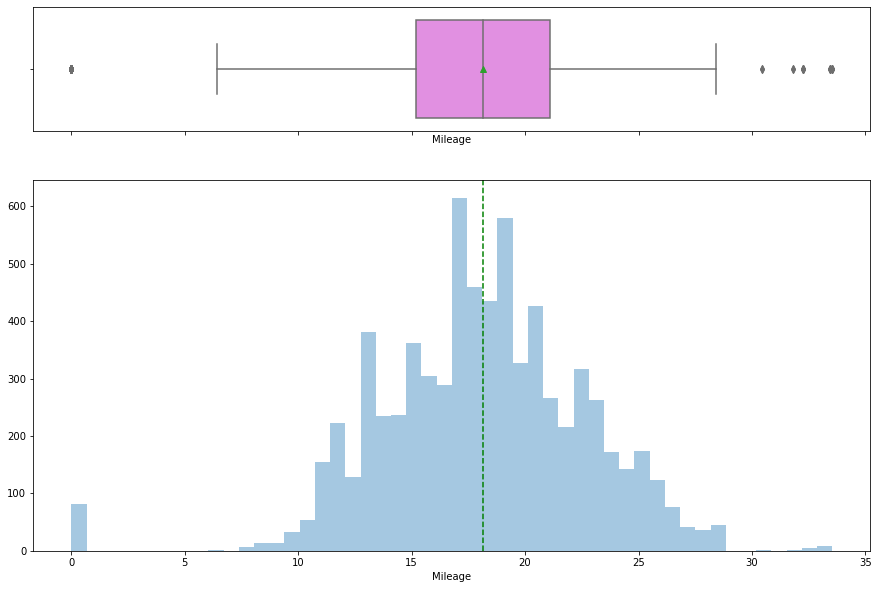

In [21]:
histogram_boxplot(data['Mileage'])
# other than the error values (mileage=0), the distribution is approximately normal

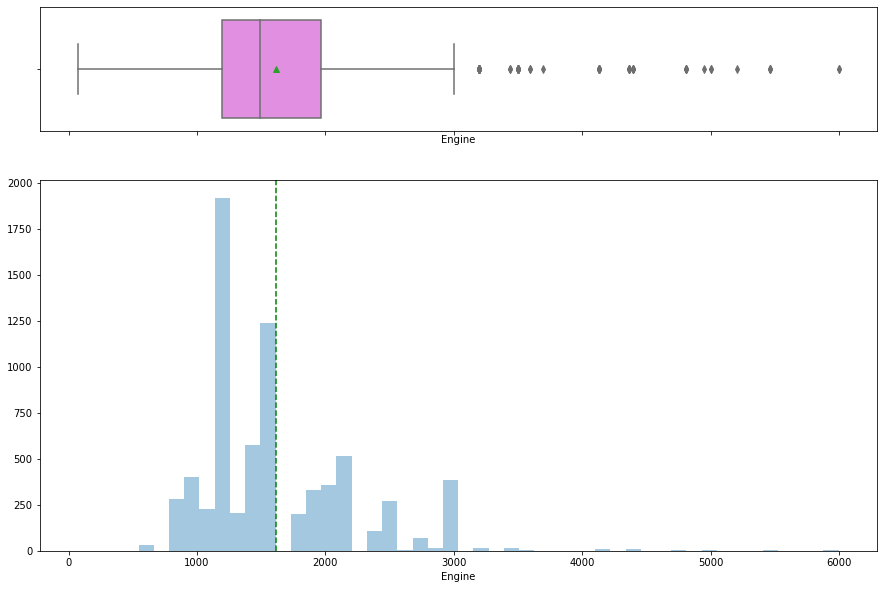

In [22]:
histogram_boxplot(data['Engine'])

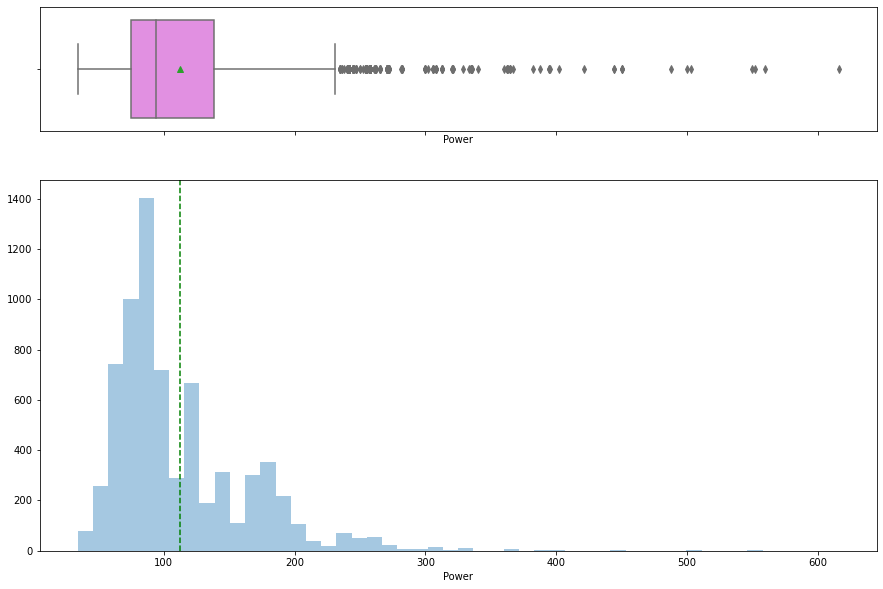

In [23]:
histogram_boxplot(data['Power'])

<AxesSubplot:xlabel='log(Power)', ylabel='Density'>

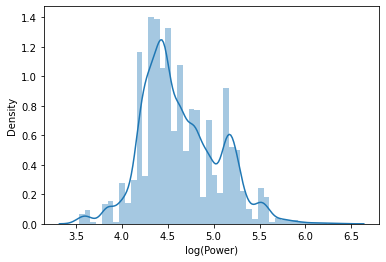

In [24]:
sns.distplot(np.log(data['Power']), axlabel = 'log(Power)')
# log transform this AFTER filling out missing values of Power

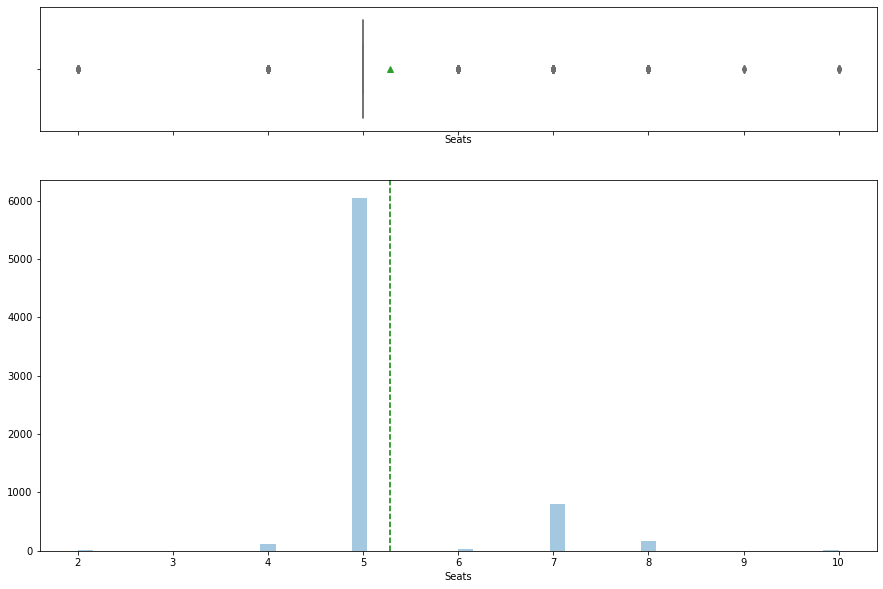

In [25]:
histogram_boxplot(data['Seats'])

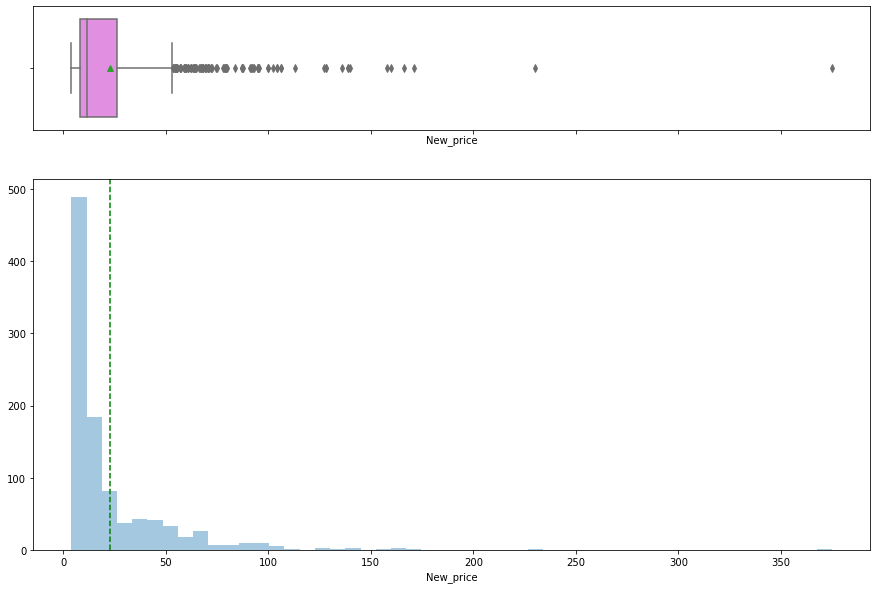

In [26]:
histogram_boxplot(data['New_price'])

<AxesSubplot:xlabel='log(New_price)', ylabel='Density'>

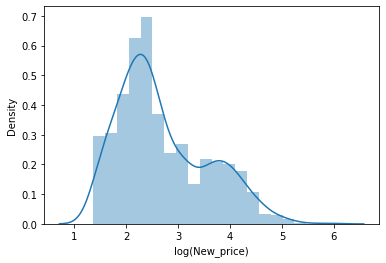

In [27]:
sns.distplot(np.log(data['New_price']), axlabel = 'log(New_price)')

In [28]:
data['new_price_log'] = np.log(data['New_price'])

**Observations and Insights for all the plots:**
- Most of the data is skewed. Log transformation normalizes them.
- Some variable distributions do not become more normally distributed after log transformation, thus we keep the original data.

## **2. Univariate analysis - Categorical Data**

In [29]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    ax = sns.countplot(data[z], palette = 'Paired', order = data[z].value_counts().index)
    
    for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
        
        x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
        y = p.get_y() + p.get_height()           # Hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage 
    
    plt.show() # Show the plot

**Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.**

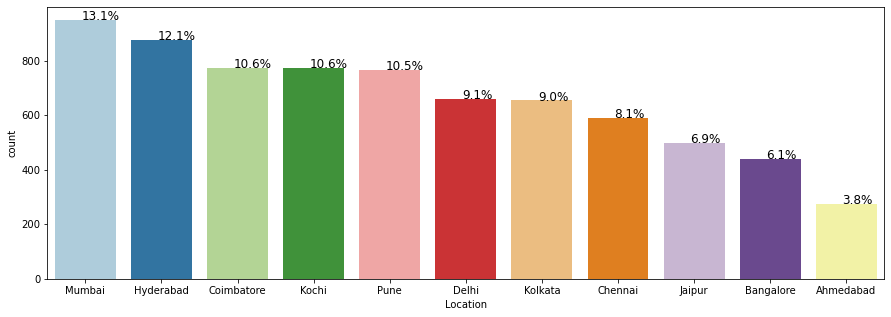

In [30]:
# Bar Plot for 'Location'
perc_on_bar('Location')

**Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type.

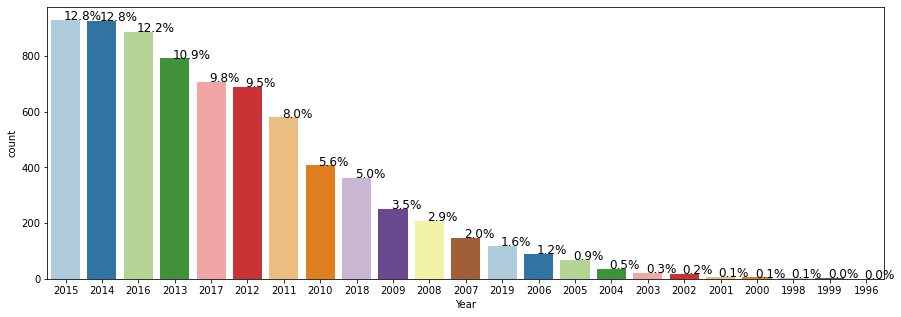

In [31]:
perc_on_bar('Year')

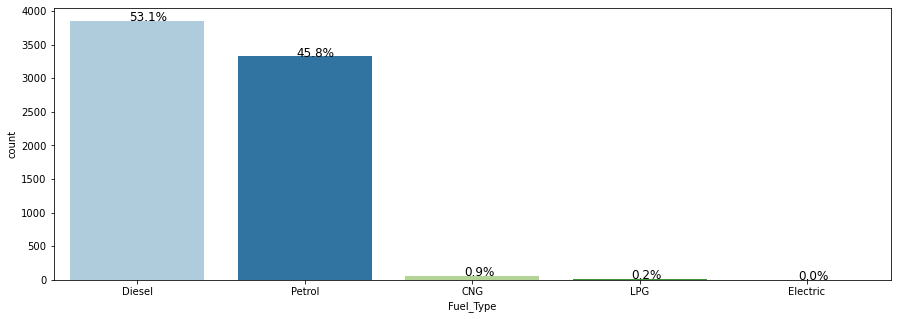

In [32]:
perc_on_bar('Fuel_Type')

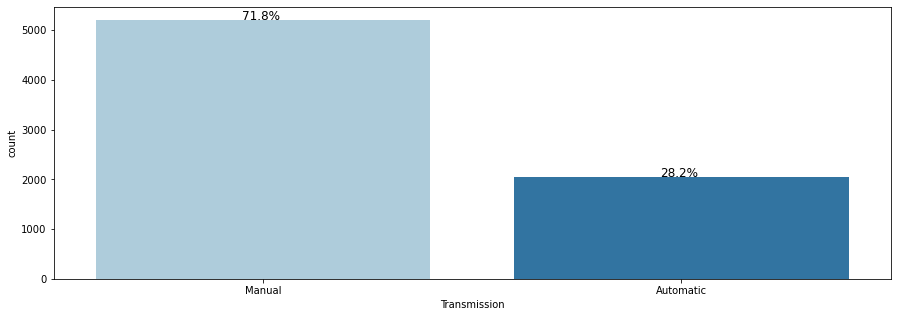

In [33]:
perc_on_bar('Transmission')

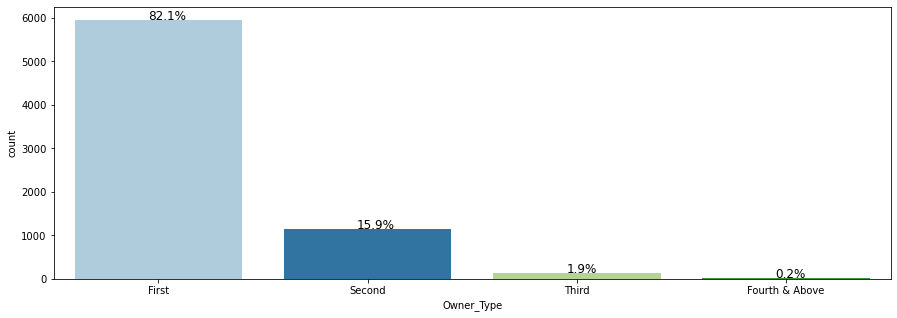

In [34]:
perc_on_bar('Owner_Type')

**Observations and Insights from all plots:**
- Most cars were produced between 2011 to 2017. Very few cars were produced before the 2000s.
- Majority of cars use the fuel type Diesel or Petrol.
- There are over twice as many Manual Transmissions as Automatic Transmissions.
- Most cars have had only one owner previously.

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

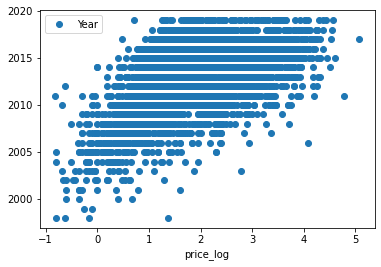

In [35]:
# Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x = 'price_log', y = 'Year', style = 'o');

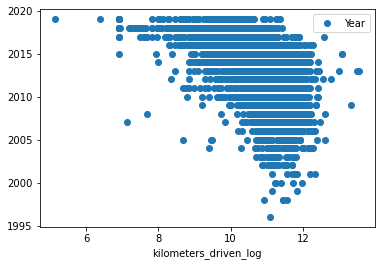

In [36]:
# Let us plot pair plot for the variables 'year' and 'kilometers_driven_log'
data.plot(x = 'kilometers_driven_log', y = 'Year', style = 'o');

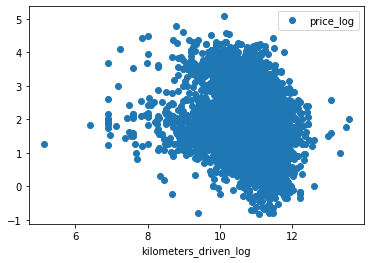

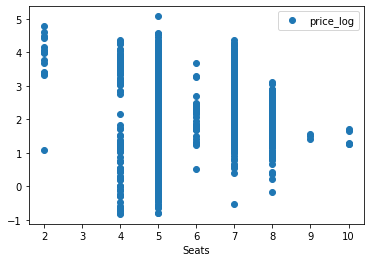

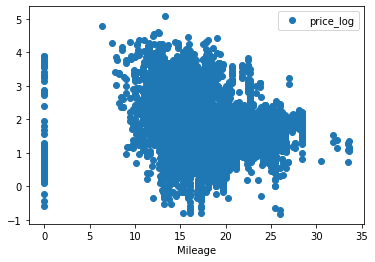

In [37]:
# Let us plot pair plots for numerical variables and 'price_log'
data.plot(x = 'kilometers_driven_log', y = 'price_log', style = 'o');
data.plot(x = 'Seats', y = 'price_log', style = 'o');
data.plot(x = 'Mileage', y = 'price_log', style = 'o');

<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

**Observations and Insights from all plots:**
- `Year` seems to have slight negative correlations with `kilometers_driven_log` and a positive correlation with `price_log`.
- `engine_log`, `power_log`, and `new_price_log` all have positive correlations with `price_log`; `new_price_log` is most positively correlated with `price_log`. 

### **2. Heat map**
Heat map shows a 2D correlation matrix between two numerical features.

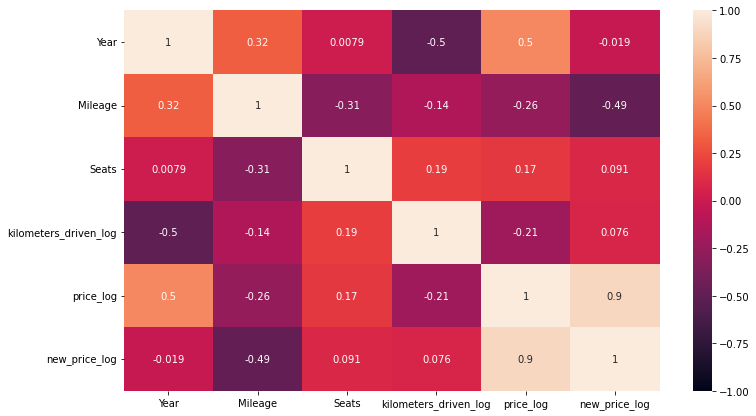

In [38]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))

sns.heatmap(data.drop(['Kilometers_Driven','Engine','Power','New_price','Price'],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

**Observations and Insights:**
- From the above plot, it seems that there are moderate to strong linear relationship between the dependent variable `price_log` and the independent variable `engine_log`, `power_log`, and `new_price_log`.

### **3. Box plot**

In [39]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = data['Price']) # Defining x and y
    
    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = data['Price'], showfliers = False) # Turning off the outliers
    
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

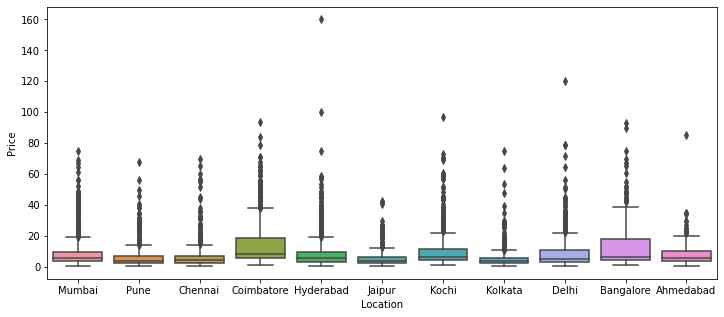

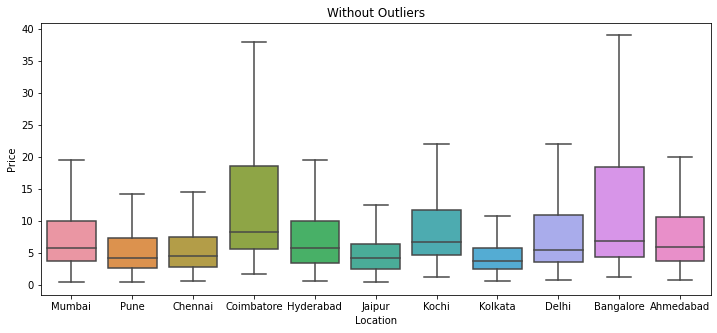

In [40]:
# Box Plot: Price vs Location
boxplot(data['Location'])

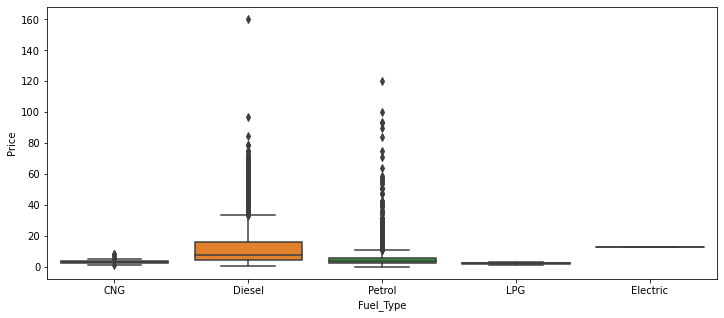

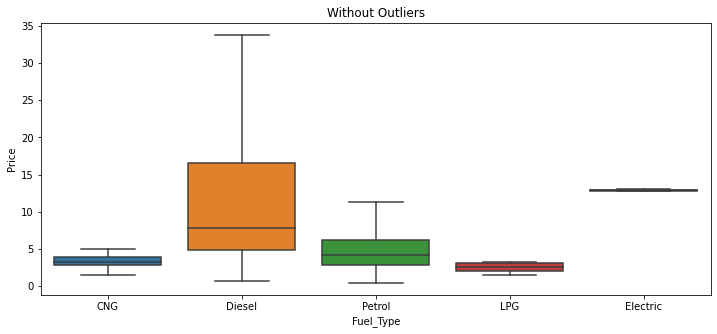

In [41]:
boxplot(data['Fuel_Type'])

In [42]:
sum(data['Fuel_Type']=='Electric')

2

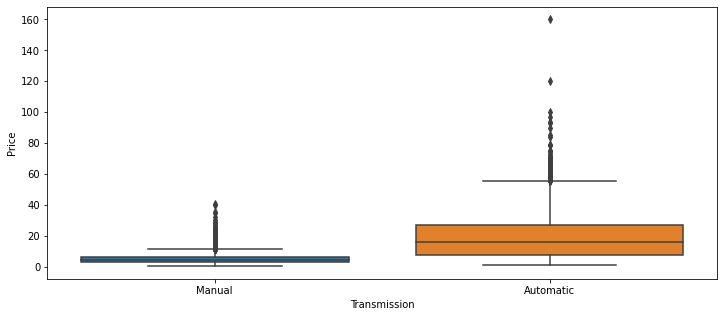

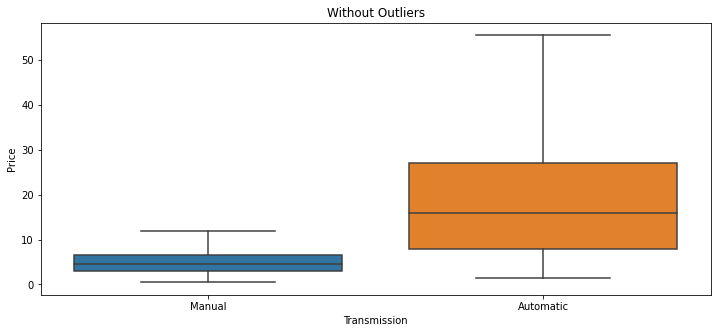

In [43]:
boxplot(data['Transmission'])

In [44]:
sum(data['Transmission']=='Manual')

5204

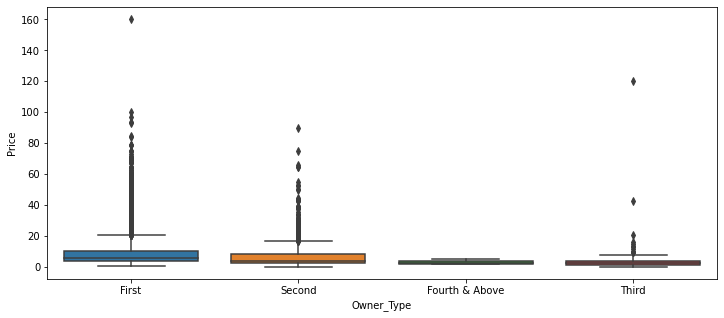

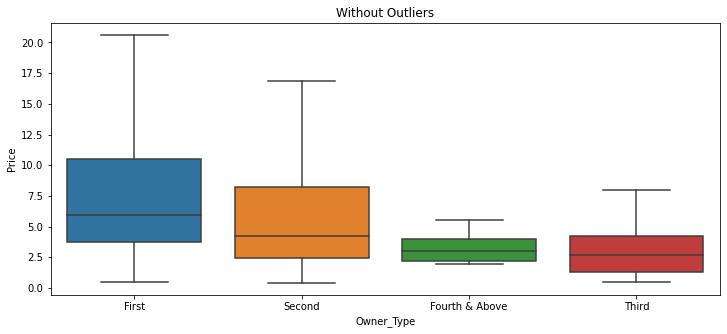

In [45]:
boxplot(data['Owner_Type'])

In [46]:
sum(data['Owner_Type']=='Fourth & Above')

12

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

**Observations and Insights for all plots:**
- There are a lot of outliers for the boxplots of `Location`, `Fuel_Type`, `Transmission`, and `Owner_Type`.
- Excluding outliers, `Price` generally stays the same with different values of `Location`. Hence, `Location` is not a good predictor for `Price`. 
- `Price` generally stays the same with different values of `Fuel_Type`. When `Fuel_Type = Electric`, `Fuel_Type` may seem suitable to predict `Price`. However, we have very little data on Electric cars, namely, two.
- Excluding outliers, the range of `Price` is small when `Transmission = Manual`. This may be useful in predicting `Price`.
- When `Owner_Type = Fourth & Above`, the range of `Price` is small and the value of `Price` may be accurately predicted.  

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [47]:
name_list = data['Name'].values.tolist() # list of names
brand_list = [x.split(" ")[0] for x in name_list]
data['Brand'] = brand_list

#### **Observations and Insights:**
- Grouping cars by `Brand` gives us more generalized information that can be further analyzed to see if it makes a good predictor for `Price`.

### **Missing value treatment**

In [48]:
# Now check the missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
Brand                       0
dtype: int64

#### **Observations and Insights:**
- Mileage, Engine, Power, Seats, New_price, Price and all their (if applicable) Log values have missing values. 

**Missing values in Seats**

In [49]:
# Checking missing values in the column 'Seats'
data[data['Seats'].isnull()].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,new_price_log,Brand
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,2.95,11.002200,1.081805,NaN,Honda
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,2.11,10.645449,0.746688,NaN,Maruti
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,NaN,NaN,3.60,11.162460,1.280934,NaN,Ford
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,NaN,NaN,NaN,NaN,1.75,11.490680,0.559616,NaN,Maruti
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0,NaN,NaN,NaN,NaN,26.50,10.915107,3.277145,NaN,Land


**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name.


In [50]:
import math

In [51]:
# Impute missing values in Seats,you can use fillna method in pandas
seat_brand = data[data['Seats'].isnull()]['Brand'].unique()
seat_brand # array of brands

# for each brand
for i in range(len(seat_brand)):
    # array of brands and model
    seat_brand_model = data[(data['Seats'].isnull())&(data['Brand']==seat_brand[i])]['Name'].unique() 
    seat_brand_avg = data[data['Brand']==seat_brand[i]]['Seats'].median()
    for j in range(len(seat_brand_model)):
        # find median number of seats for particular Brand and Model
        fill_in = data[data['Name']==seat_brand_model[j]]['Seats'].median()
        if math.isnan(fill_in):
            # use the median of a brand if model only contains missing values in column 'Seats'
            fill_in = seat_brand_avg
        # fill in missing values
        indices_to_be_updated = data[(data['Seats'].isnull())&(data['Name']==seat_brand_model[j])].index
        data.loc[indices_to_be_updated, 'Seats'] = fill_in

In [52]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data['Seats'].isnull().sum()

0

**Missing values for Mileage**

In [53]:
# Now check missing values of each column. Hint: Use isnull() method
data[data['Mileage'].isnull()].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,new_price_log,Brand
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00,10.819778,2.564949,2.608598,Mahindra
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75,10.691945,2.545531,NaN,Toyota


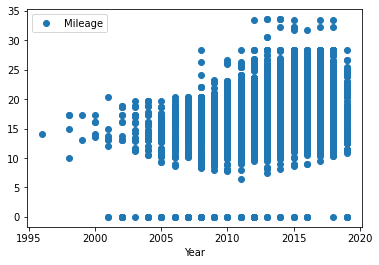

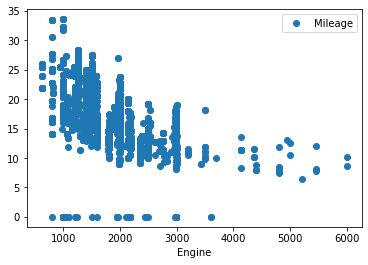

In [54]:
data.plot(x = 'Year', y = 'Mileage', style = 'o');
data.plot(x = 'Engine', y = 'Mileage', style = 'o');
#sns.boxplot(x = data['Fuel_Type'], y = data['Mileage']);
#sns.boxplot(x = data['Transmission'], y = data['Mileage']);
#sns.boxplot(x = data['Transmission'], y = data['Mileage'], showfliers = False); # Turning off the outliers


Except Engine, none of the variables above are good predictors for the variable Mileage. However, Engine may not be the best predictor in general. Because the distribution of Mileage is approximately normal, we may use that to fill in missing values. HOWEVER, LET US START OFF WITH A SIMPLE METHOD. **Fill in missing values with the mean** since the data is approximately symmetric. 

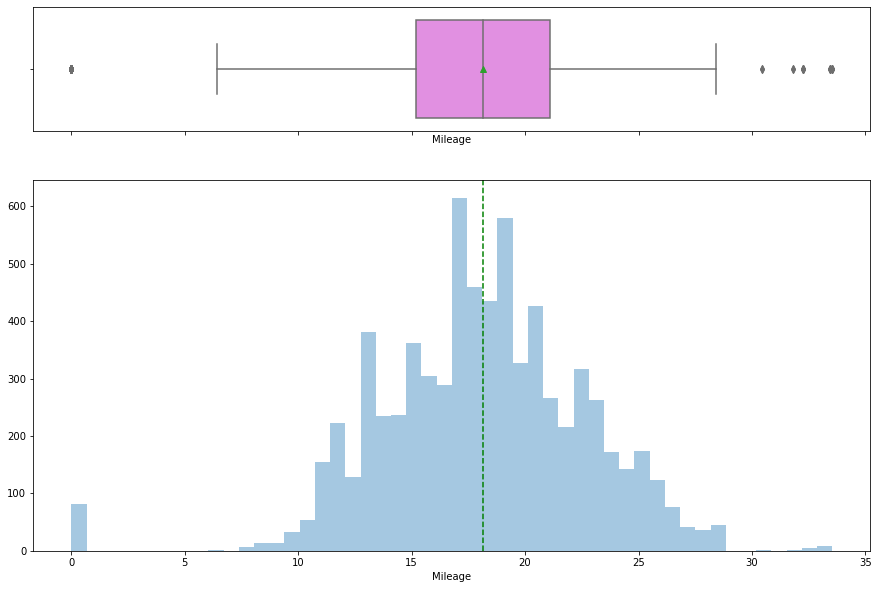

In [55]:
histogram_boxplot(data['Mileage'])
# exclude outliers 
# print(data[data['Mileage']>0]['Mileage'].mean(), data[data['Mileage']>0]['Mileage'].std())

In [56]:
# Impute missing Mileage. For example, use can use median or any other methods.
mileage_mean = data[data['Mileage']>0]['Mileage'].mean()

# Mileage of cars can not be 0, so we will treat 0's as missing values
# Replace 0's with random values from a norm dist mean=mileage_mean, std=mileage_std
indices_to_be_updated = data[(data['Mileage'].isnull())|(data['Mileage']==0)].index
data.loc[indices_to_be_updated, 'Mileage'] = mileage_mean

In [57]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data['Mileage'].isnull().sum()

0

In [58]:
# Check if mileage of any car is 0
sum(data['Mileage']==0)

0

**Missing values for Engine**

In [59]:
data['Engine'].isnull().sum()

46

In [60]:
indices_to_be_updated = data[(data['Engine'].isnull())].index
data.loc[indices_to_be_updated, 'Engine'] = data['Engine'].median()

In [61]:
data['Engine'].isnull().sum()

0

**Missing values for Power**

In [62]:
data['Power'].isnull().sum()

175

In [63]:
# because I logged "power", do I still need to fill in missing values of the original variable Power?
indices_to_be_updated = data[(data['Power'].isnull())].index
data.loc[indices_to_be_updated, 'Power'] = data['Power'].median()

In [64]:
data['Power'].isnull().sum()

0

In [65]:
# because the distribution of Power is skewed, 
# we will use power_log as a featured variable instead
data['power_log'] = np.log(data['Power'])

**Missing values for New_price**

In [66]:
sum(data['New_price'].isnull())/data.shape[0]

0.8612796469939327

Since 86% of the data is missing, we will drop this variable.

In [67]:
data.drop(columns=['New_price','new_price_log'], inplace=True)

In [68]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'kilometers_driven_log', 'price_log', 'Brand', 'power_log'],
      dtype='object')

**Missing values for Price**

In [69]:
sum(data['Price'].isnull())/data.shape[0]

0.1701599558742416

In [70]:
# Drop the rows where 'Price' == NaN
data = data[data["Price"].notna()]

data.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
Price                    0
kilometers_driven_log    0
price_log                0
Brand                    0
power_log                0
dtype: int64

**Observations for missing values after imputing:**
- For the target variable Price, the missing values can be dropped since it adds bias to the data

## **Proposed approach**

- **Potential techniques -** What different techniques should be explored?
- **Overall solution design -** What is the potential solution design?
- **Measures of success -** What are the key measures of success?

### **Saving the Data**

Please save the pre-processed dataset into a separate file so that we can continue without having to repeat the work we did in Milestone1. The stored data frame can be loaded into Milestone2 and implemented further.

To save the pre-processed data frame, please follow the below lines of code:

In [71]:
# data is the pre-processed data frame in your code

data.to_csv("cars_data_updated.csv", index = False)

The above code helps to save the cleaned/pre-processed dataset into csv file, that can be further loaded later on.

## **Model Building**

1. What we want to predict is the "Price". **We will use the normalized version 'price_log' for modeling.**
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

**Note:** Please load the data frame that was saved in Milestone 1 here before separating the data, and then proceed to the next step in Milestone 2.

### **Load the data**

In [72]:
import pandas as pd

cars_data = pd.read_csv("cars_data_updated.csv")

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Think about it:** Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

We should **drop 'Name'** because there are too many unique values it takes on as a categorical variable that we may not be able to see any patterns/make confident conclusions about. We are also **dropping 'Price' and 'price_log'** because our target variable is price. Since the distribution of **'Kilometers_Driven' is skewed**, we log-transformed the variable and will be using that. We did the same to the variable 'Power', so we will **drop 'Power'** and use 'power_log'. **'Brand'** has too many unique values so let's drop it for now. We can come back to it later to see if we can improve our model with it.

In [73]:
# Step-1
X = cars_data.drop(['Name','Price','price_log','Kilometers_Driven','Power','Brand'], axis = 1)
y = cars_data[["price_log", "Price"]]

In [74]:
# Step-2 Use pd.get_dummies(drop_first = True)
X = pd.get_dummies(X, drop_first = True)

In [75]:
# Step-3 Splitting data into training and test set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape, X_test.shape)

(4212, 24) (1806, 24)


In [76]:
# Let us write a function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train = model.predict(X_train)
    
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    
    pred_test_ = np.exp(pred_test)
    
    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)
    
    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)
    
    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)
    
    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)
    
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-sqaure on training set : ", metrics.r2_score(y_train['Price'], pred_train_))
        
        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))
        
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))
    
    # Returning the list with train and test scores
    return score_list

<hr>

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [77]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [78]:
# Create a linear regression model
lr = LinearRegression()

In [79]:
# Fit linear regression model
lr.fit(X_train, y_train['price_log']) 

LinearRegression()

In [80]:
# Get score of the model
import numpy as np
import sklearn.metrics as metrics
LR_score = get_model_score(lr)

R-sqaure on training set :  0.8256980572438891
R-square on test set :  0.7970791082225017
RMSE on training set :  4.664470836271185
RMSE on test set :  5.020451990898969


In [81]:
print(cars_data['Price'].min(), cars_data['Price'].max())

0.44 160.0


**Observations from results:**
- R-square is good, as roughly 80% of the variance in the target variable is explained by the features in both the training and test set. There is no signs of overfitting or underfitting.
- Considering that the variable 'Price' ranges from 0.44 to 160 (in INR 100,000) and that RMSE is in the same unit as Price, our RMSE of about 5 is a small difference between our predicted and actual values.

**Important variables of Linear Regression**

Building a model using statsmodels.

In [82]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train = sm.add_constant(X_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    
    # Create the model
    olsmodel = sm.OLS(y_train["price_log"], train)
    
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1330.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:49:26   Log-Likelihood:                -858.28
No. Observations:                4212   AIC:                             1767.
Df Residuals:                    4187   BIC:                             1925.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [83]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues

In [84]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

,coef,pval
Location_Jaipur,-0.058614,4.470715e-02
Seats,-0.017562,1.806426e-02
Mileage,-0.006189,2.165222e-03
Fuel_Type_Electric,0.978795,1.201728e-03
Owner_Type_Third,-0.129230,1.647102e-04
Fuel_Type_Petrol,-0.232912,4.535859e-06
Location_Coimbatore,0.126850,3.321265e-06
Owner_Type_Second,-0.063179,2.562303e-06
Location_Hyderabad,0.145948,4.167280e-08
Location_Bangalore,0.173185,8.255351e-09


In [85]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
mp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in mp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in cars_data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)

                
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical variables of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical variables of LINEAR REGRESSION  are  :
 ['Location', 'Seats', 'Mileage', 'Fuel_Type', 'Owner_Type', 'kilometers_driven_log', 'Engine', 'Transmission', 'power_log', 'Year']


In [86]:
# from sklearn.metrics import mean_squared_error
print("R-square on training set : ", metrics.r2_score(y_train['Price'], np.exp(olsmodel1.predict(x_train))))
print("R-square on test set : ", metrics.r2_score(y_test['Price'], np.exp(olsmodel1.predict(x_test))))
print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], np.exp(olsmodel1.predict(x_train)))))
print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], np.exp(olsmodel1.predict(x_test)))))

R-square on training set :  0.825698057243857
R-square on test set :  0.7970791082223176
RMSE on training set :  4.664470836271614
RMSE on test set :  5.020451990901245


**Build Ridge / Lasso Regression similar to Linear Regression:**<br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [87]:
# Import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge

In [88]:
# Create a Ridge regression model
ridge = Ridge()

In [89]:
# Fit Ridge regression model
ridge.fit(X_train, y_train['price_log'])

Ridge()

In [90]:
# Get score of the model
Ridge_score = get_model_score(ridge)

R-sqaure on training set :  0.8251933293797014
R-square on test set :  0.7967202317382165
RMSE on training set :  4.671219431538282
RMSE on test set :  5.024889499125231


**Observations from results:**
- R-square and RMSE are about as good as the ones from our linear regression model.

### **Decision Tree** 

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [91]:
# Import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor

In [92]:
# Create a decision tree regression model, use random_state = 1
dtree = DecisionTreeRegressor(max_depth=2, random_state=1)

In [93]:
# Fit decision tree regression model
dtree.fit(X_train, y_train['price_log'])

DecisionTreeRegressor(max_depth=2, random_state=1)

In [94]:
# Get score of the model
Dtree_model = get_model_score(dtree)

R-sqaure on training set :  0.4961818978211294
R-square on test set :  0.504023852445483
RMSE on training set :  7.930273252682853
RMSE on test set :  7.848918738210134


In [95]:
# try different max_depth value
dtree = DecisionTreeRegressor(max_depth=5, random_state=1)
dtree.fit(X_train, y_train['price_log'])
Dtree_model = get_model_score(dtree)

R-sqaure on training set :  0.8109073917884928
R-square on test set :  0.7777013788405309
RMSE on training set :  4.8583471557830356
RMSE on test set :  5.254698733244568


**Observations from results:**
- The performance of the Decision Tree heavily relies on its parameters. max_depth<5 had less accurate predictions so I chose max_depth=5. 
- R-square and RMSE are about as good as the ones from our linear and ridge regression models.

Print the importance of features in the tree building. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.


In [96]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
power_log                  0.701876
Year                       0.244851
Engine                     0.040905
Transmission_Manual        0.005602
Fuel_Type_Petrol           0.003005
kilometers_driven_log      0.002613
Mileage                    0.001148
Location_Mumbai            0.000000
Owner_Type_Second          0.000000
Owner_Type_Fourth & Above  0.000000
Fuel_Type_LPG              0.000000
Fuel_Type_Electric         0.000000
Fuel_Type_Diesel           0.000000
Location_Pune              0.000000
Location_Kochi             0.000000
Location_Kolkata           0.000000
Location_Jaipur            0.000000
Location_Hyderabad         0.000000
Location_Delhi             0.000000
Location_Coimbatore        0.000000
Location_Chennai           0.000000
Location_Bangalore         0.000000
Seats                      0.000000
Owner_Type_Third           0.000000


**Observations and insights:**
- The importance of power_log (measured by the number 0.701876) is much greater than the rest of the features.

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [97]:
# Import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor

In [98]:
# Create a Randomforest regression model 
rforest = RandomForestRegressor(random_state=1)

In [99]:
# Fit Randomforest regression model
rforest.fit(X_train, y_train['price_log'])

RandomForestRegressor(random_state=1)

In [100]:
# Get score of the model
rforest_model = get_model_score(rforest)

R-sqaure on training set :  0.9703873697180477
R-square on test set :  0.8574381285170478
RMSE on training set :  1.9226036409041019
RMSE on test set :  4.208052323427754


**Observations and insights:**
- R-square is better in this model than the previous ones. It can explain the variance in the target variable for 10% more data than the other models. 
- There may be signs of overfitting with the R-square close to 1 and the difference in RMSE on the training and test set.

**Feature Importance**

In [101]:
# Print important features similar to decision trees
print(pd.DataFrame(rforest.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
power_log                  0.621900
Year                       0.235295
Engine                     0.046083
Mileage                    0.023773
kilometers_driven_log      0.023262
Transmission_Manual        0.009277
Seats                      0.005971
Location_Kolkata           0.005563
Location_Hyderabad         0.003704
Location_Coimbatore        0.003466
Fuel_Type_Diesel           0.003435
Fuel_Type_Petrol           0.003348
Owner_Type_Second          0.002210
Location_Mumbai            0.001915
Location_Bangalore         0.001723
Location_Jaipur            0.001722
Location_Delhi             0.001687
Owner_Type_Third           0.001495
Location_Pune              0.001440
Location_Kochi             0.001246
Location_Chennai           0.001183
Fuel_Type_Electric         0.000237
Owner_Type_Fourth & Above  0.000054
Fuel_Type_LPG              0.000009


**Observations and insights:**
- power_log is still the most significant feature here.

### **Hyperparameter Tuning: Decision Tree**

In [102]:
#from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

# Choose the type of estimator 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
# Check documentation for all the parametrs that the model takes and play with those
parameters = {'max_depth': [None], 
               'criterion': ['friedman_mse'],
              'min_samples_leaf': [1, 3, 5, 7],
              'max_leaf_nodes' : [2, 5, 7] + [None],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train['price_log'])


DecisionTreeRegressor(criterion='friedman_mse', min_samples_leaf=7,
                      random_state=1)

In [103]:
# Get score of the dtree_tuned
dtree_tuned_model = get_model_score(dtree_tuned)

R-sqaure on training set :  0.8996598786856357
R-square on test set :  0.7954777997045908
RMSE on training set :  3.5390653254152076
RMSE on test set :  5.040221997406665


**Observations and insights:_____________**

**Feature Importance**

In [104]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
power_log                  0.652916
Year                       0.243933
Engine                     0.051848
Mileage                    0.015178
kilometers_driven_log      0.011581
Transmission_Manual        0.005933
Fuel_Type_Petrol           0.005831
Location_Kolkata           0.003727
Seats                      0.003158
Location_Hyderabad         0.002128
Location_Coimbatore        0.001202
Location_Jaipur            0.000508
Location_Kochi             0.000491
Location_Pune              0.000336
Fuel_Type_Diesel           0.000331
Location_Mumbai            0.000284
Location_Delhi             0.000273
Location_Bangalore         0.000205
Owner_Type_Second          0.000140
Fuel_Type_Electric         0.000000
Fuel_Type_LPG              0.000000
Location_Chennai           0.000000
Owner_Type_Fourth & Above  0.000000
Owner_Type_Third           0.000000


**Observations and insights:_____**

### **Hyperparameter Tuning: Random Forest**

In [105]:
from sklearn.metrics import r2_score
# Choose the type of Regressor
rforest_tuned = RandomForestRegressor(random_state = 1)

# Define the parameters for Grid to choose from 
parameters = {"n_estimators": [110, 120],
              "max_depth": [5, 7],
              "max_features": [0.8, 1]
             }

# Check documentation for all the parametrs that the model takes and play with those

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(rforest_tuned, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the model to the best combination of parameters
rforest_tuned_regressor = grid_obj.best_estimator_

# Fit the best algorithm to the data
rforest_tuned_regressor.fit(X_train, y_train['price_log'])

RandomForestRegressor(max_depth=7, max_features=0.8, n_estimators=110,
                      random_state=1)

In [106]:
# Get score of the model
rforest_tuned_regressor_model = get_model_score(rforest_tuned_regressor)

R-sqaure on training set :  0.9029918864555784
R-square on test set :  0.8334893474421088
RMSE on training set :  3.4798081249819255
RMSE on test set :  4.5477904849854855


**Observations and insights:**
- R-square is not better in this model than the random forest model; however, this model may be less overfitted as the difference in RMSE on the training and test set is smaller.

**Feature Importance**

In [107]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(rforest_tuned_regressor.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
power_log                  0.543316
Year                       0.238641
Engine                     0.135502
Transmission_Manual        0.036091
kilometers_driven_log      0.013545
Mileage                    0.011238
Fuel_Type_Diesel           0.005999
Seats                      0.004586
Fuel_Type_Petrol           0.002512
Location_Kolkata           0.002164
Location_Coimbatore        0.001414
Location_Hyderabad         0.000968
Owner_Type_Third           0.000799
Location_Jaipur            0.000539
Location_Mumbai            0.000525
Location_Kochi             0.000525
Owner_Type_Second          0.000377
Location_Bangalore         0.000294
Location_Pune              0.000289
Location_Delhi             0.000289
Fuel_Type_Electric         0.000214
Location_Chennai           0.000163
Owner_Type_Fourth & Above  0.000009
Fuel_Type_LPG              0.000001


**Observations and insights:**
- power_log and year continue to be the most significant variables.

In [108]:
# Defining list of models you have trained
models = [lr, dtree, dtree_tuned, ridge, rforest, rforest_tuned_regressor]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:
    
    # Accuracy score
    j = get_model_score(model, False)
    
    r2_train.append(j[0])
    
    r2_test.append(j[1])
    
    rmse_train.append(j[2])
    
    rmse_test.append(j[3])

In [109]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Decision Tree','Decision Tree (tuned)', 'Ridge Regression', 'Random Forest', 'Random Forest (tuned)'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test}) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.825698,0.797079,4.664471,5.020452
1,Decision Tree,0.810907,0.777701,4.858347,5.254699
2,Decision Tree (tuned),0.899660,0.795478,3.539065,5.040222
3,Ridge Regression,0.825193,0.796720,4.671219,5.024889
4,Random Forest,0.970387,0.857438,1.922604,4.208052
5,Random Forest (tuned),0.902992,0.833489,3.479808,4.547790


**Observations:**
- The Random Forest model has the highest R-square value, but it also contains the largest different between the R-square value in the training and test set. 
- Linear Regression, Decision Tree, and Ridge Regression generally perform the same.

**Note:** You can also try some other algorithms such as KNN and compare the model performance with the existing ones.

### **Insights**

**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?